Make two folders: images, masks





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import skimage.draw
import numpy as np
from tqdm import tqdm
import cv2
from glob import glob
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Helpers

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
        
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    if len(path) == 0:
        return None
    
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    
    
    
label_map = {'Epithelial':1,
             'Lymphocyte':2,
             'Macrophage':4,
             'Neutrophil':3,
            }


# Root directory of the project
ROOT_DIR = os.path.abspath(".")
print(ROOT_DIR)
# Training file directory
IMAGES_FOLDER = os.path.join(ROOT_DIR, "dataset", "MoNuSAC_images_and_annotations/")
MASKS_FOLDER = os.path.join(ROOT_DIR, "dataset", "MoNuSAC_masks/")
print(IMAGES_FOLDER, MASKS_FOLDER)

/home/hasib/MoNuSAC-ISBI-2020
/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/ /home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/


In [3]:
IMAGES_DEST =  os.path.join(ROOT_DIR, "dataset", "processed", "images/")
MASKS_DEST = os.path.join(ROOT_DIR, "dataset", "processed", "masks/")

print(IMAGES_DEST)
print(MASKS_DEST)

# Create folders
create_directory(IMAGES_DEST)
create_directory(MASKS_DEST)

/home/hasib/MoNuSAC-ISBI-2020/dataset/processed/images/
/home/hasib/MoNuSAC-ISBI-2020/dataset/processed/masks/


In [4]:
IMAGES_SUB_FOLDER = sorted([os.path.join(IMAGES_FOLDER, i) for i in os.listdir(IMAGES_FOLDER)])
IMAGES_SUB_FOLDER[:5]

['/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-55-1594-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-5P-A9K0-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-69-7760-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-69-A59K-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-73-4668-01Z-00-DX1']

In [5]:
MASKS_SUB_FOLDER = sorted([os.path.join(MASKS_FOLDER, i) for i in os.listdir(MASKS_FOLDER)])
MASKS_SUB_FOLDER[:5]

['/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-55-1594-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-5P-A9K0-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-69-7760-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-69-A59K-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-73-4668-01Z-00-DX1']

In [6]:
print(IMAGES_SUB_FOLDER[0])
print(MASKS_SUB_FOLDER[0])

/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-55-1594-01Z-00-DX1
/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-55-1594-01Z-00-DX1


In [7]:
images = []
masks = []

for ct in range(len(IMAGES_SUB_FOLDER[:2])):
    print(ct)
    
    print(IMAGES_SUB_FOLDER[ct], MASKS_SUB_FOLDER[ct])

    # Read all raw images in image sub folder
    all_imgs = sorted(glob(IMAGES_SUB_FOLDER[ct] + '/*.tif'))

    # Read the mask sub folders
    all_mask_sub_dir = sorted(glob(MASKS_SUB_FOLDER[ct]+ '/*'))

    # Iterate over the individual raw images
    for i in range(len(all_imgs)):

        #print(i)
        img = read_nuclei(all_imgs[i])

        # Save it
        # .............
        #save_nuclei(IMAGES_DEST+ "{}_{}.png".format(ct, i), img)
        #print(IMAGES_DEST+ "{}_{}.png".format(ct, i))
        
        # Add to list
        images.append(img)


    # Iterate over the individual mask sub folders
    for j in range(len(all_mask_sub_dir)):

        # Go to each sub folder
        # Read the 4 class folders
        class_sub_dir = sorted(glob(all_mask_sub_dir[j]+ '/*'))  

        # Make list for masks from each class fodlers
        final_masks = []

        # For each class folder get the mask
        for i in range(len(class_sub_dir)):

            # get the mask in the subfolder
            mask_paths = sorted(glob(class_sub_dir[i] + '/*.tif'))

            # If more than one mask present in folder(maybe not)
            # For each class folder: 1) read the mask 2) Convert to class label from the binary class label
            for j in range(len(mask_paths)):

                if i == 0:
                    epithelial_mask = read_nuclei(mask_paths[j])
                    epithelial_mask = np.where(epithelial_mask==255.0, 1.0, epithelial_mask)
                    final_masks.append(epithelial_mask)

                if i == 1:
                    lymphocyte_mask = read_nuclei(mask_paths[j])
                    lymphocyte_mask = np.where(lymphocyte_mask==255.0, 2.0, lymphocyte_mask)
                    final_masks.append(lymphocyte_mask)
                if i == 2:
                    macrophage_mask = read_nuclei(mask_paths[j])
                    macrophage_mask = np.where(macrophage_mask==255.0, 4.0, macrophage_mask)
                    final_masks.append(macrophage_mask)
                if i == 3:
                    neutrophil_mask = read_nuclei(mask_paths[j])
                    neutrophil_mask = np.where(neutrophil_mask==255.0, 3.0, neutrophil_mask)
                    final_masks.append(neutrophil_mask)

        # Overlay two masks

        #print(len(final_masks)) # Sanity check

        if len(final_masks) == 1:
            # If only one mask, read it directly
            mask = final_masks[0]
        else:
            # For multiple masks, read maximum along the axis
            #mask = np.maximum.reduce(*final_masks, dtype=np.float64)
            mask = np.amax(final_masks, axis=0)

        print(mask.shape)

        print(ct, i,j)
        
        # Save it
        # .............
        
        #save_nuclei(MASKS_DEST + "{}_{}_{}_mask.png".format(ct, i, j), mask)
        #print(MASKS_DEST + "{}_{}_{}_mask.png".format(ct, i, j))
        
        # Add to list
        masks.append(mask)

    
print(len(images), len(masks))

0
/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-55-1594-01Z-00-DX1 /home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-55-1594-01Z-00-DX1
(1024, 1024)
0 3 0
(512, 512)
0 3 0
(512, 512)
0 3 0
(512, 512)
0 3 0
(512, 512)
0 3 0
1
/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-5P-A9K0-01Z-00-DX1 /home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-5P-A9K0-01Z-00-DX1
(1153, 1307)
1 3 0
(763, 756)
1 3 0
(185, 497)
1 3 0
8 8


Uniques:  [0. 2.]


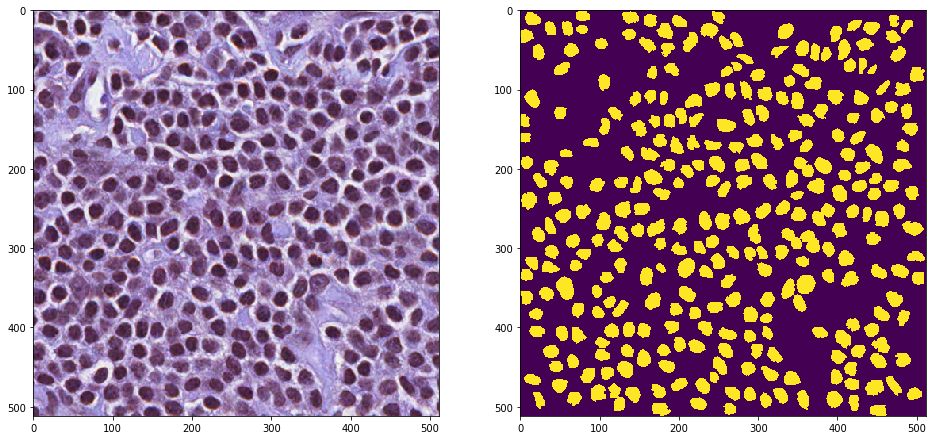

In [8]:
f, axarr = plt.subplots(1,2, figsize=(16,16))
ct = 1

assert images[ct].shape[:-1] == masks[ct].shape
axarr[0].imshow(images[ct])
axarr[1].imshow(masks[ct])

val = masks[ct].flatten()
print("Uniques: ", np.unique(val))